In [1]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Accuracy metrics 


In [2]:
df = pd.read_csv('Dataset/csv/v4_coords.csv')

In [3]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1234)

print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 510
Validation set size: 45
Test set size: 46


In [4]:
y_test

221         Left_Hook
341     Left_Uppercut
410             Guard
253        Right_Hook
323     Left_Uppercut
596              Idle
590              Idle
219         Left_Hook
504              Idle
534              Idle
66                Jab
226        Right_Hook
342     Left_Uppercut
464             Guard
412             Guard
487             Guard
331     Left_Uppercut
266        Right_Hook
299        Right_Hook
29                Jab
77           Straight
585              Idle
545              Idle
320     Left_Uppercut
415             Guard
156         Left_Hook
576              Idle
229        Right_Hook
100          Straight
285        Right_Hook
192         Left_Hook
112          Straight
146          Straight
324     Left_Uppercut
435             Guard
271        Right_Hook
167         Left_Hook
388    Right_Uppercut
290        Right_Hook
163         Left_Hook
428             Guard
463             Guard
535              Idle
461             Guard
95           Straight
468       

In [5]:
nan_values = df.isna().sum()
print(nan_values)

class    0
x1       0
y1       0
z1       0
v1       0
x2       0
y2       0
z2       0
v2       0
x3       0
y3       0
z3       0
v3       0
x4       0
y4       0
z4       0
v4       0
x5       0
y5       0
z5       0
v5       0
x6       0
y6       0
z6       0
v6       0
x7       0
y7       0
z7       0
v7       0
x8       0
y8       0
z8       0
v8       0
x9       0
y9       0
z9       0
v9       0
x10      0
y10      0
z10      0
v10      0
dtype: int64


# Pipeline of the classfication

In [6]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import *

In [8]:
model = make_pipeline(StandardScaler(), SVC(probability=True)).fit(X_train, y_train)
y_probs = model.predict_proba(X_train)

In [9]:
version = 4_2
with open(f'../Model/v{version}_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [11]:
y_pred = model.predict(X_train)

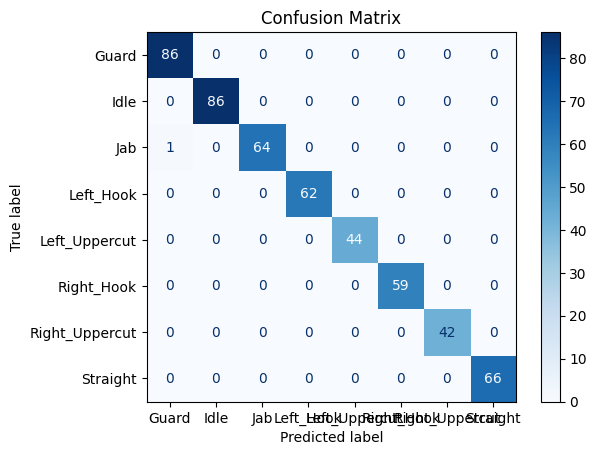

In [14]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Menghitung metrik
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Menampilkan laporan klasifikasi untuk recall, precision, dan F1-score
report = classification_report(y_train, y_pred)
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

         Guard       0.99      1.00      0.99        86
          Idle       1.00      1.00      1.00        86
           Jab       1.00      0.98      0.99        65
     Left_Hook       1.00      1.00      1.00        62
 Left_Uppercut       1.00      1.00      1.00        44
    Right_Hook       1.00      1.00      1.00        59
Right_Uppercut       1.00      1.00      1.00        42
      Straight       1.00      1.00      1.00        66

      accuracy                           1.00       510
     macro avg       1.00      1.00      1.00       510
  weighted avg       1.00      1.00      1.00       510



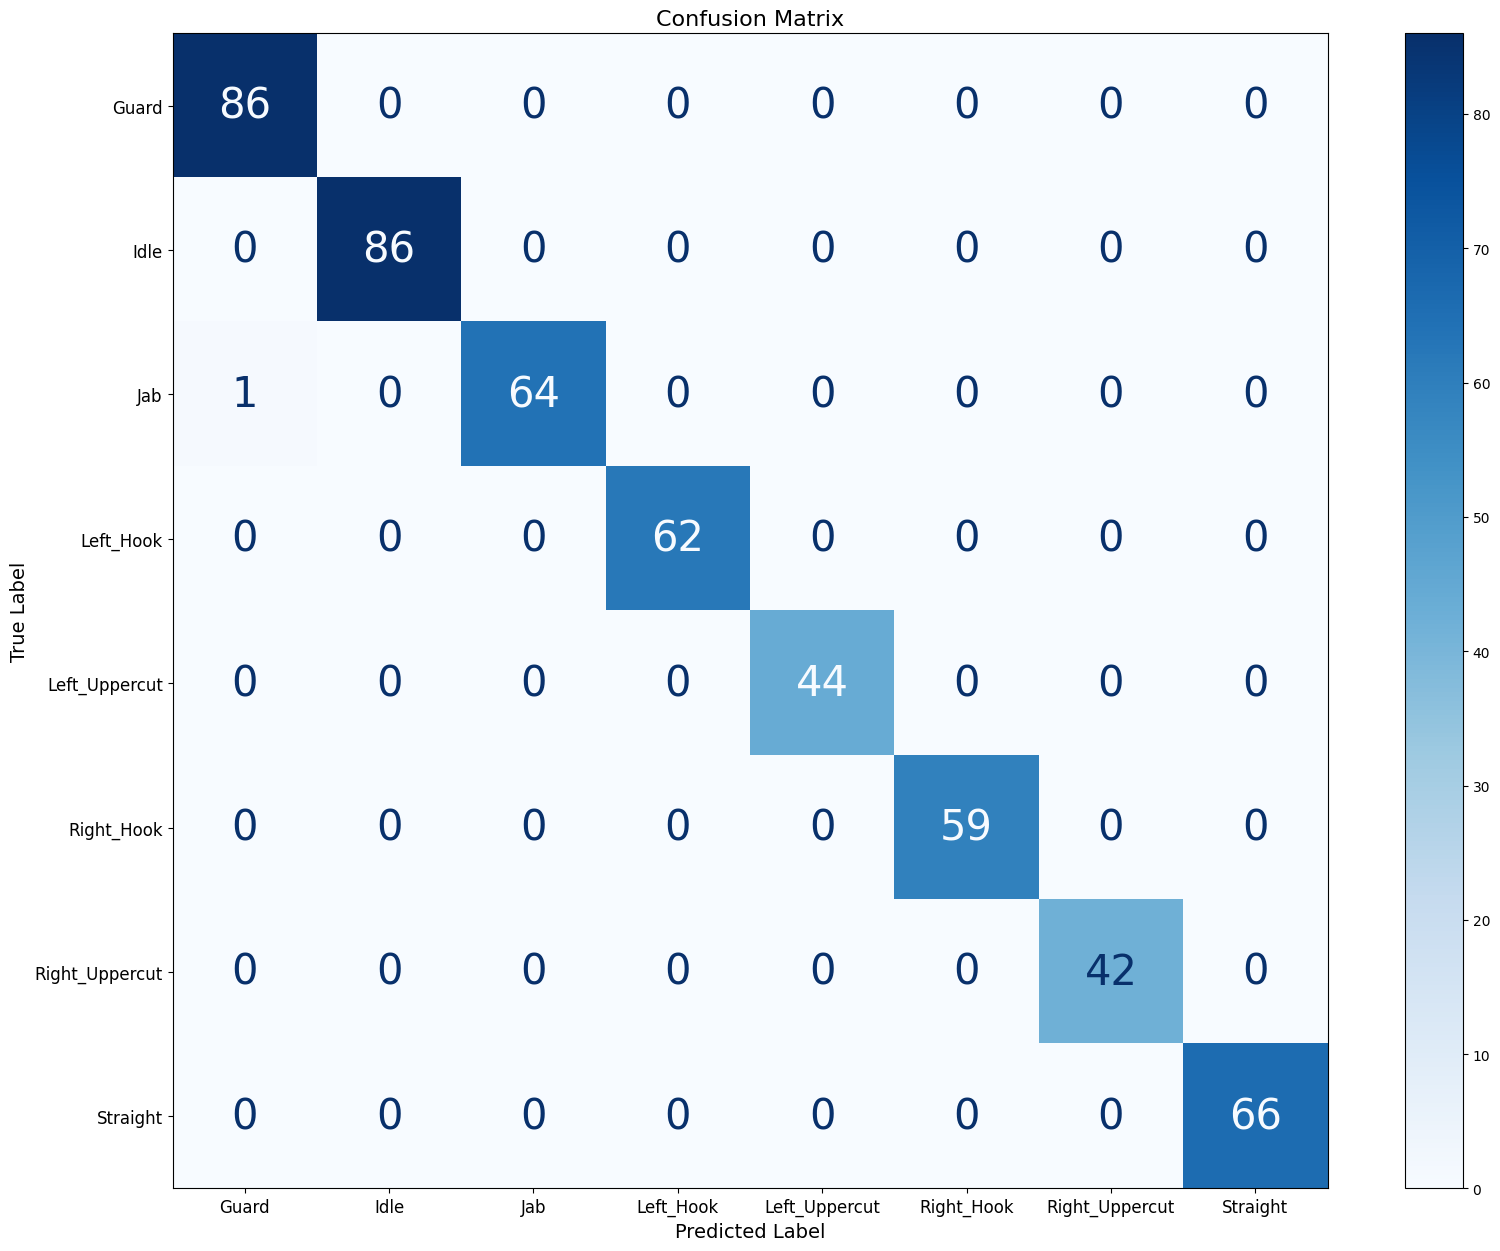

In [17]:
import numpy as np

# Menyesuaikan ukuran figure
plt.figure(figsize=(20, 15))

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=True)

# Menyesuaikan ukuran font angka di dalam confusion matrix
for text in plt.gca().texts:
    text.set_fontsize(30)  # Atur ukuran font angka di matriks

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Menghitung metrik keseluruhan
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")


Accuracy: 1.00
Precision (Weighted): 1.00
Recall (Weighted): 1.00
F1 Score (Weighted): 1.00


In [95]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Mendapatkan probabilitas prediksi
y_probs = model.predict_proba(X_test)

# Ambang batas untuk klasifikasi
threshold = 0.1

# Menentukan prediksi berdasarkan ambang batas
y_pred_thresholded = (y_probs[:, 1] >= threshold).astype(int)  # Asumsikan kelas positif adalah indeks 1

# Mengubah y_test ke format biner jika multi-kelas
y_test_binary = (y_test == model.classes_[1]).astype(int)

# Hitung TP, FP, TN, FN
conf_matrix = confusion_matrix(y_test_binary, y_pred_thresholded)
tn, fp, fn, tp = conf_matrix.ravel()

# Menampilkan hasil
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 14
False Positives (FP): 0
True Negatives (TN): 77
False Negatives (FN): 0
